Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import convolve
import cv2
import urllib.request


Some files that need to be downloaded or saved for the code below to work:

In [ ]:
iris = sns.load_dataset('iris')
iris.to_csv("iris.csv",
            sep=',',
            index=False)

urllib.request.urlretrieve("https://nc.molgen.mpg.de/cloud/index.php/s/o3n2n7ezNTbyXAc/download/lorem.txt",
                           "lorem.txt")



('lorem.txt', <http.client.HTTPMessage at 0x7b9569048310>)

# Python workshop
This Jupyter Notebook is to make following the presentation easier and so that you don't have to type out everything :)

Feel free to modify, add or remove code. Play around with the results to see how they change or inspect them more closely.

Cells can be executed by pressing Ctrl + Enter or Shift + Enter (executes and moves to the next cell).


# Data Types

In [ ]:
print(2 + 3)
print("hello" + "world")
print(True + False)
print(True + 1)
print(["version"] + [2])

5
helloworld
1
2
['version', 2]


In [ ]:
x_list = ["a", 1, 2.3, True, False, 3]
x_list[1:4]

[1, 2.3, True]

In [ ]:
microscope = {
  "brand": "Zeiss",
  "model": "LSM 980",
  "year": 2020,
  "price": 999999
}

In [ ]:
print(microscope["brand"])

Zeiss


In [ ]:
microscope["broken"] = True
microscope["price"] = 200

In [ ]:
microscope.keys()

dict_keys(['brand', 'model', 'year', 'price', 'broken'])

In [ ]:
microscope.values()

dict_values(['Zeiss', 'LSM 980', 2020, 200, True])

In [ ]:
x = np.array([[1,2],        # 2-dimensional
              [3,4],
              [5,6]])

y = np.array([[[1,2,3],     # 3-dimensional
               [4,5,6]],
              [[7,8,9],
               [9,8,7]]])

In [ ]:
x.shape

(3, 2)

In [ ]:
y.shape

(2, 2, 3)

# Python as a calculator

In [ ]:
a = 1+2-10      # add/subtracting numbers up
b = (7*4)/2     # multiplication and division
c = a**2        # raise to the power of x

In [ ]:
50 - 5*6

20

In [ ]:
17 // 3  # floor division discards the fractional part

5

In [ ]:
17 % 3  # the % operator returns the remainder of the division

2

In [ ]:
0.1 + 0.2

0.30000000000000004

In [ ]:
0.1 + 0.2 == 0.3

False

In [ ]:
format(0.1, ".20g")

'0.10000000000000000555'

In [ ]:
import math

math.isclose(0.1 + 0.2, 0.3)

True

In [ ]:
np.allclose([1e10, 1e-8], [1.00001e10, 1e-9])

True

In [ ]:
np.isclose([1e10, 1e-7], [1.00001e10, 1e-8])

array([ True, False])

## Numpy operations

In [ ]:
img = np.random.randint(0, 255, size=(500,500,3)) # random matrix

i, j = (10, 200)

img[i,:,:] = img[j,:]     # set the values of row i with values from row j
img[:,i] = 100          # set all values in column i to 100

In [ ]:
img[:100, :50, :].sum()     # the sum of the values of the first 100 rows and 50 columns


1900788

In [ ]:
img[50:100, 50:100, :]      # rows 50-100, columns 50-100 (100th not included)

array([[[ 51, 231, 165],
        [168,  35,  80],
        [  1, 170, 186],
        ...,
        [223, 252,  58],
        [110,  75,  69],
        [156,  37, 114]],

       [[254, 188,  21],
        [233, 210, 153],
        [170, 236, 110],
        ...,
        [183, 153,   3],
        [ 50,  91,  19],
        [101, 146,   3]],

       [[144,  96, 253],
        [ 55,  29, 113],
        [ 82,   1, 145],
        ...,
        [147,  47, 184],
        [ 30, 251,  41],
        [232, 145, 183]],

       ...,

       [[207, 148, 181],
        [ 50, 178, 252],
        [243,  89,  93],
        ...,
        [250,   9,  17],
        [  2,  58,  79],
        [154, 154, 227]],

       [[ 88, 248,  85],
        [183,  57,  30],
        [  0, 173, 244],
        ...,
        [ 58, 118, 135],
        [ 35,  70,  46],
        [ 66, 182, 175]],

       [[167, 114, 199],
        [ 74, 101,  88],
        [132, 152, 106],
        ...,
        [ 46, 190,  94],
        [192, 101, 240],
        [210, 119, 221]]

In [ ]:
img[i].mean()           # average of row i

128.44933333333333

In [ ]:
img[:,-1]               # last column

array([[101,  49, 132],
       [ 50,  59,  94],
       [185, 248,  71],
       ...,
       [235,  15, 183],
       [ 36, 231,  74],
       [196,  92, 188]])

In [ ]:
img[-2,:]               # second to last row

array([[155,  60, 205],
       [213,  30, 211],
       [119, 168,  65],
       ...,
       [  8, 228,  48],
       [238, 111, 235],
       [ 36, 231,  74]])

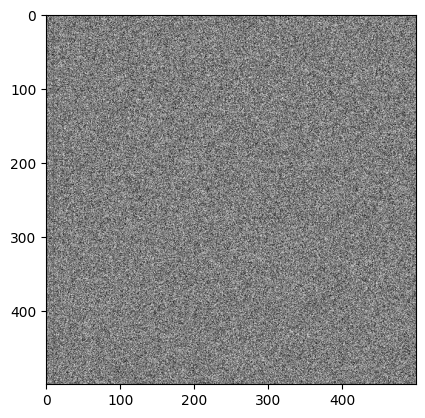

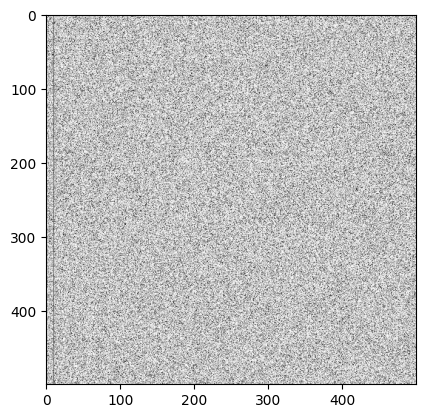

254
0


In [ ]:
# Average RGB value.
mimg = img.mean(axis=2)
plt.imshow(mimg, cmap='gray')
plt.show()

# show max value per channel
plt.imshow(img.max(axis = 2), cmap='gray')
plt.show()

print(img.max())
print(img.min())

In [ ]:
a = np.random.randint(0, 255, size=100)
b = np.random.randint(0, 255, size=100)

c = a - b           # element-wise subtraction.
a_transpose = a.T   # transpose


In [ ]:
# index of max value
np.argmax(a)

4

In [ ]:
np.where(a == np.max(a))

(array([4]),)

In [ ]:
a1_length = np.dot(a,b)/np.linalg.norm(b)


In [ ]:
# multiply two 2D matrices
A = np.random.randint(0, 255, size=(500,250))
B = np.random.randint(0, 255, size=(500,250))
AxB = np.dot(A, B.T)

print(AxB.shape)

(500, 500)


In [ ]:
# multiply two 3D matrices
# matmul assumes 2D matrices in last two indices!
img = img.reshape(3, img.shape[0], img.shape[1])
mult_img = np.matmul(img, img.transpose((0,2,1)))

# Loops and conditionals

## if clauses

In [ ]:
a = 200
b = 33
if b > a:
  print("b is greater than a")
elif a == b:
  print("a and b are equal")
else:
  print("a is greater than b")

a is greater than b


## for loops

In [ ]:
fruits = ["apple", "banana", "cherry"]

for x in fruits:
    print(x)
    if x == "banana":
        print("I don't like banana.")

apple
banana
I don't like banana.
cherry


In [ ]:
for i in range(1,10):
    if i == 5:
        continue
    print("Number", i)

Number 1
Number 2
Number 3
Number 4
Number 6
Number 7
Number 8
Number 9


In [ ]:
for i in range(1,10):
    if i == 5:
        break
    print("Number", i)

Number 1
Number 2
Number 3
Number 4


In [ ]:
results = [None] * 1000         # Make a list of 1000 None's.
for i in range(1000):
    is_even = (i % 2) == 0
    results[i] = is_even        # Save result in spot in list.

print(results[:10])

[True, False, True, False, True, False, True, False, True, False]


In [ ]:
nums = [1, 2, 3]
letters = ["a", "b", "c"]

for idx, val in enumerate(letters):     # get the index and value.
    print(idx, val)


0 a
1 b
2 c


In [ ]:
for val1, val2 in zip(nums, letters):   # Loop over two lists.
    print(val1, val2)

1 a
2 b
3 c


In [ ]:
squared_nums = []
for number in range(10):
    if number % 2 == 0:
        squared = number ** 2
        squared_nums.append(squared)

In [ ]:
squared_numbers = [i**2 for i in range(10) if i % 2 == 0]


while clause

In [ ]:
i = 0
while i < 6:
  print(i)
  i += 1
else:
  print("i is no longer less than 6")

0
1
2
3
4
5
i is no longer less than 6


# Functions and Classes

In [1]:
def fib(n, a=0, b=1):
    """Print a Fibonacci series up to n."""
    result = []
    while a < n:
        result.append(a)
        a, b = b, a+b
    return result

In [2]:
fib(500)    # == fib(n=500, a=0, b=1) or fib(500,0,1)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

In [ ]:
def square_x(x, y = 2):
    return x ** y

In [ ]:
square_x(5)

25

In [ ]:
square_x(5,3)

125

In [ ]:
def f():
    global x
    x = 40
    print(x)

In [ ]:
x=20
f()
print(x)

40
40


## Classes

In [ ]:
class Dog:
    kind = 'canine'         # class variable shared by all instances

    def __init__(self, name, breed, age):
        self.name = name    # instance variable unique to each instance
        self.breed = breed
        self.age = age
        self.tricks = []

    def describe(self): # class method
        print(self.name, "is a(n)", self.breed, "and", self.age, "years old.")

    def add_trick(self, trick):
        self.tricks.append(trick) # We can change instance variables.

In [ ]:
d = Dog(name = "Rex", breed = "German Shepherd", age = 4)

In [ ]:
d.describe()

Rex is a(n) German Shepherd and 4 years old.


In [ ]:
d.kind

'canine'

In [ ]:
d2 = Dog(name = "Laika", breed = "unknown breed", age = 3)

In [ ]:
d2.add_trick("roll over")
d2.add_trick("fly to space")
d2.tricks

['roll over', 'fly to space']

In [ ]:
d.tricks

[]

In [ ]:
d2.describe()

Laika is a(n) unknown breed and 3 years old.


In [ ]:
isinstance(d, Dog)

True

# Libraries

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(6, 4),
                  index = ["R1", "R2", "R3", "R4", "R5", "R6"],
                  columns=["C1", "C2", "C3", "C4"])

In [ ]:
df

,C1,C2,C3,C4
R1,-0.290766,-0.052559,-2.190745,-0.087998
R2,0.221877,-0.633083,-0.093002,0.721082
R3,0.109668,-0.011998,0.688271,1.024811
R4,-1.161132,0.285634,-0.886647,0.140839
R5,-0.006876,0.039771,1.156289,0.559716
R6,-0.190564,0.194253,-0.064783,1.899585


In [ ]:
df.iloc[0:2, 0:2]

,C1,C2
R1,-0.290766,-0.052559
R2,0.221877,-0.633083


In [ ]:
df.loc["R1":"R2", ["C1", "C2"]]

,C1,C2
R1,-0.290766,-0.052559
R2,0.221877,-0.633083


In [ ]:
# read from a file
file = open("lorem.txt", "r+")
lines = file.read().splitlines()
file.close()
lines

['Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.',
 'Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.',
 'Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur.',
 'Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.']

In [ ]:
# write to a file with "with"
with open("newfile.txt", "w") as file2:
    newline = "text to add to file"
    file2.write(newline)

In [ ]:
df = pd.read_csv('iris.csv',
                 sep=',')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
mat = np.genfromtxt('iris.csv',
                    delimiter=',',
                    skip_header = 1,
                    usecols = range(4))
mat

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
df.to_csv("pd_iris.csv",
          sep=',',
          index=False)

In [ ]:
np.savetxt("np_iris.csv",
           mat,
           delimiter=",")

<Axes: ylabel='Density'>

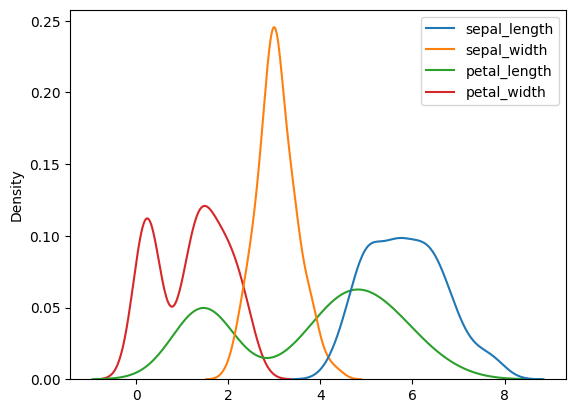

In [ ]:
import seaborn as sns
sns.kdeplot(data=df)

# Examples

## Download some pictures
Let me know if this does not work!

In [ ]:
import urllib.request
urllib.request.urlretrieve("https://nc.molgen.mpg.de/cloud/index.php/s/8MxXGpcCtyEQzfK/download/starry_night.jpg",
                           "starry_night.jpg")

urllib.request.urlretrieve("https://nc.molgen.mpg.de/cloud/index.php/s/z94YdCgwMbT6aiZ/download/pig_tissue.tif",
                           "pig_tissue.tif")

('pig_tissue.tif', <http.client.HTTPMessage at 0x7b951643f220>)

## Starry night

The Values of a picture

In [ ]:
# read in image



Plotting a single color channel

In [ ]:
# Decide on channel to plot


# Plot picture.
# use cmap to set color!




Cropping

In [ ]:
# slice and plot image



 Convert to grayscale

In [ ]:

# Convert to grayscale:
# Red*0.2989 + Green*0.5870 + Blue*0.1140



# Plot



Edge detection

In [ ]:
# Make array for Sobel filter Dx



# Make array for Sobel filter Dy


# Convolve image with filters
# Consider image size when convolving them.


# Calculate magnitude


In [ ]:
# Plot image gradient


## Pig Tissue

In [ ]:
# Load image

# Reduce picture size. (Optional)

# convert BGR to RGB colors

# same as the more cryptic img = img[...,::-1]

# plot


Rotate image

In [ ]:
# find center of image

# make rotation matrix, f(center, degrees, scale)

# rotate image

# plot


mean RGB

In [ ]:
# Calc. row-wise mean

# Convert to pandas data frame

# Optional: pivot from wide to long format.



RGB lineplot

In [ ]:
# Optional: Pick custom colors.

# Use seaborn to plot d
# plot pandas dataframe.

